In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/Users/briannagreen/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# https://fivethirtyeight.com/features/women-in-comic-books/
# https://github.com/fivethirtyeight/data/tree/master/comic-characters
    # could also do analysis for DC characters

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

In [4]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [6]:
df['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [7]:
df['SEX'].value_counts()

Male Characters           11638
Female Characters          3837
Agender Characters           45
Genderfluid Characters        2
Name: SEX, dtype: int64

<AxesSubplot:>

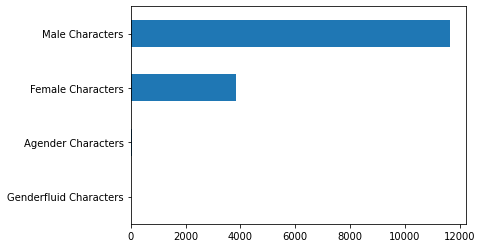

In [8]:
df['SEX'].value_counts(ascending=True).plot(kind='barh')

In [9]:
# alt.Chart(df).mark_bar().encode(
#     #alt.X("Total Student Count", bin=alt.Bin(maxbins=100)),
#     x="count()",
#     y="SEX",
# ).properties(width=700)

In [10]:
df_male = df[df['SEX'] == "Male Characters"]

In [11]:
number_male = df_male.count()

In [12]:
number_male_appearances = df_male["APPEARANCES"].sum()
number_male_appearances

182601.0

In [13]:
df_male['ALIGN'].value_counts(normalize=True)

Bad Characters        0.547824
Good Characters       0.304392
Neutral Characters    0.147783
Name: ALIGN, dtype: float64

In [14]:
df_female = df[df['SEX'] == "Female Characters"]

In [15]:
number_female = df_female.count()

In [16]:
number_female_appearances = df_female["APPEARANCES"].sum()
number_female_appearances

73005.0

In [17]:
df_female['ALIGN'].value_counts(normalize=True)

Good Characters       0.487472
Bad Characters        0.309546
Neutral Characters    0.202981
Name: ALIGN, dtype: float64

In [18]:
number_male / (number_male + number_female)

page_id             0.752052
name                0.752052
urlslug             0.752052
ID                  0.749733
ALIGN               0.755525
EYE                 0.699688
HAIR                0.729344
SEX                 0.752052
GSM                 0.545455
ALIVE               0.752052
APPEARANCES         0.751759
FIRST APPEARANCE    0.753666
Year                0.753666
dtype: float64

In [19]:
number_male_appearances / (number_male_appearances + number_female_appearances)

0.7143846388582428

<AxesSubplot:>

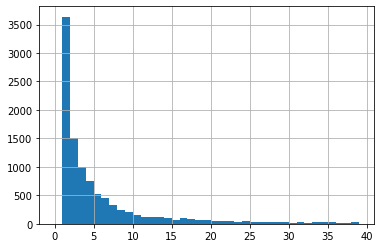

In [20]:
df_male["APPEARANCES"].hist(bins=range(0, 40))

<AxesSubplot:>

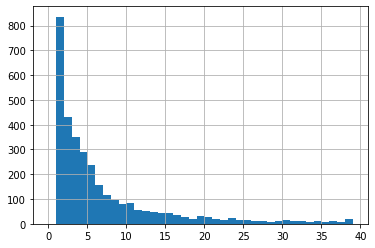

In [21]:
df_female["APPEARANCES"].hist(bins=range(0, 40))

In [22]:
# Explore differences in Good/Bad alignment between characters with blond hair & blue eyes, 
# and characters with any other hair/eye combination

In [23]:
pd.DataFrame(df['HAIR'].unique())

,0
0,Brown Hair
1,White Hair
2,Black Hair
3,Blond Hair
4,No Hair
5,Blue Hair
6,Red Hair
7,Bald
8,Auburn Hair
9,Grey Hair


In [24]:
pd.DataFrame(df['EYE'].unique())

,0
0,Hazel Eyes
1,Blue Eyes
2,Brown Eyes
3,Green Eyes
4,Grey Eyes
5,Yellow Eyes
6,Gold Eyes
7,Red Eyes
8,Black Eyeballs
9,Amber Eyes


In [25]:
# See how many characters made their first appearance each year

In [26]:
df_year = df["Year"].value_counts().sort_index().rename_axis('Year').reset_index(name='count')
df_year.head()

,Year,count
0,1939.0,69
1,1940.0,221
2,1941.0,207
3,1942.0,244
4,1943.0,198


In [27]:
# Identify if each character has blond hair + blue eyes, or not

In [34]:
df["blond_blue"] = np.where(((df["HAIR"] == "Blond Hair") | (df["HAIR"] == "Strawberry Blond Hair") | (df["HAIR"] == "Reddish Blond Hair") | (df["HAIR"] == "Gold Hair") | (df["HAIR"] == "Yellow Hair") | (df["HAIR"] == "White Hair")) & (df["EYE"] == "Blue Eyes"), True, False)

In [35]:
df["blond_blue"].value_counts()

False    15571
True       805
Name: blond_blue, dtype: int64

In [36]:
df[df["blond_blue"] == True].ALIGN.value_counts(normalize=True)

Good Characters       0.560166
Bad Characters        0.290456
Neutral Characters    0.149378
Name: ALIGN, dtype: float64

In [37]:
# Number of characters with blond/blue who are good
df[(df["blond_blue"] == True) & (df["ALIGN"] == "Good Characters")].name.count()

405

In [38]:
# Total number of appearances of good blond/blue characters
df[(df["blond_blue"] == True) & (df["ALIGN"] == "Good Characters")].APPEARANCES.sum()

# Blond/blue good characters made an average of 88.5 appearances

35852.0

In [39]:
df[df["blond_blue"] == False].ALIGN.value_counts(normalize=True)

Bad Characters        0.506970
Good Characters       0.329491
Neutral Characters    0.163539
Name: ALIGN, dtype: float64

In [40]:
# Number of characters without blond/blue who are good
df[(df["blond_blue"] == False) & (df["ALIGN"] == "Good Characters")].name.count()

4231

In [41]:
# Total number of appearances of good non blond/blue characters
df[(df["blond_blue"] == False) & (df["ALIGN"] == "Good Characters")].APPEARANCES.sum()

# Non blond/blue good characters made an average 27.1 appearances

114751.0

In [42]:
# For blond hair, blue eye characters, 56% are good, 29% are bad, and 15% are neutral
# For all other characters, 33% are good, 51% are bad, and 16% are neutral

In [43]:
# How many blond hair/blue eye characters, of any alignment, were introduced each year?

In [44]:
df_year_bb = df[df["blond_blue"] == True].groupby(by="Year").blond_blue.count().reset_index(name='blond_blue_count')
df_year_bb

,Year,blond_blue_count
0,1939.0,2
1,1940.0,11
2,1941.0,5
3,1942.0,1
4,1943.0,3
5,1944.0,1
6,1945.0,3
7,1946.0,2
8,1947.0,3
9,1948.0,9


In [45]:
# How many total characters, and blond hair/blue eye characters were introduced each year?

In [46]:
df_year = df_year.merge(df_year_bb, left_on='Year', right_on='Year')
df_year.head()

,Year,count,blond_blue_count
0,1939.0,69,2
1,1940.0,221,11
2,1941.0,207,5
3,1942.0,244,1
4,1943.0,198,3


In [47]:
# How many non blond hair/blue eye characters were introduced each year?

In [48]:
df_year_not_bb = df[df["blond_blue"] == False].groupby(by="Year").blond_blue.count().reset_index(name='not_blond_blue_count')
df_year_not_bb.head()

,Year,not_blond_blue_count
0,1939.0,67
1,1940.0,210
2,1941.0,202
3,1942.0,243
4,1943.0,195


In [49]:
df_year = df_year.merge(df_year_not_bb, left_on='Year', right_on='Year')
df_year.head()

,Year,count,blond_blue_count,not_blond_blue_count
0,1939.0,69,2,67
1,1940.0,221,11,210
2,1941.0,207,5,202
3,1942.0,244,1,243
4,1943.0,198,3,195


In [50]:
# How many blond hair/blue eye characters, with 'Good' alignment, were introduced each year?

In [51]:
df_year_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == True)].groupby(by="Year").blond_blue.count().reset_index(name="blond_blue_good_count")
#df_year_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == True)].groupby(by="Year").count()
df_year_bl_bl_good

,Year,blond_blue_good_count
0,1939.0,2
1,1940.0,9
2,1941.0,3
3,1943.0,2
4,1944.0,1
5,1945.0,2
6,1946.0,1
7,1947.0,1
8,1948.0,6
9,1950.0,2


In [52]:
df_year = df_year.merge(df_year_bl_bl_good, left_on='Year', right_on='Year')
df_year.head()

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count
0,1939.0,69,2,67,2
1,1940.0,221,11,210,9
2,1941.0,207,5,202,3
3,1943.0,198,3,195,2
4,1944.0,134,1,133,1


In [53]:
# How many not blond hair/blue eye characters, with 'Good' alignment, were introduced each year?

In [54]:
df_year_not_bl_bl_good = df[(df["ALIGN"] == "Good Characters") & (df["blond_blue"] == False)].groupby(by="Year").blond_blue.count().reset_index(name="not_blond_blue_good_count")
df_year_not_bl_bl_good.head()

,Year,not_blond_blue_good_count
0,1939.0,19
1,1940.0,109
2,1941.0,59
3,1942.0,59
4,1943.0,40


In [55]:
df_year = df_year.merge(df_year_not_bl_bl_good, left_on='Year', right_on='Year')
df_year.head()

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count
0,1939.0,69,2,67,2,19
1,1940.0,221,11,210,9,109
2,1941.0,207,5,202,3,59
3,1943.0,198,3,195,2,40
4,1944.0,134,1,133,1,15


In [56]:
# Percent of 'good' characters in blond/blue eye category, and not blond/blue eye category, for each year

In [57]:
df_year['pct_bl_bl_good'] = df_year['blond_blue_good_count'] / df_year['blond_blue_count']
df_year['pct_not_bl_bl_good'] = df_year['not_blond_blue_good_count'] / df_year['not_blond_blue_count']
df_year

,Year,count,blond_blue_count,not_blond_blue_count,blond_blue_good_count,not_blond_blue_good_count,pct_bl_bl_good,pct_not_bl_bl_good
0,1939.0,69,2,67,2,19,1.000000,0.283582
1,1940.0,221,11,210,9,109,0.818182,0.519048
2,1941.0,207,5,202,3,59,0.600000,0.292079
3,1943.0,198,3,195,2,40,0.666667,0.205128
4,1944.0,134,1,133,1,15,1.000000,0.112782
5,1945.0,97,3,94,2,2,0.666667,0.021277
6,1946.0,90,2,88,1,6,0.500000,0.068182
7,1947.0,72,3,69,1,3,0.333333,0.043478
8,1948.0,116,9,107,6,30,0.666667,0.280374
9,1950.0,29,2,27,2,10,1.000000,0.370370


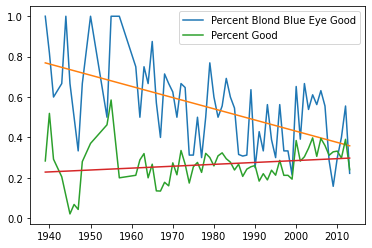

In [58]:
#df_year.plot.line()
plt.plot(df_year['Year'], df_year['pct_bl_bl_good'], label='Percent Blond Blue Eye Good')
m, b = np.polyfit(df_year['Year'], df_year['pct_bl_bl_good'], 1)
plt.plot(df_year['Year'], m*df_year['Year'] + b)

plt.plot(df_year['Year'], df_year['pct_not_bl_bl_good'], label='Percent Good')
m, b = np.polyfit(df_year['Year'], df_year['pct_not_bl_bl_good'], 1)
plt.plot(df_year['Year'], m*df_year['Year'] + b)

plt.legend()

plt.show()

In [ ]:
df_year.to_csv("marvel_characters.csv", index=False)